<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Train/FlowersDataSet/Test_experiments/DenseNet121ArchFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
 
from tensorflow.keras.applications.densenet import DenseNet121

from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
 
import datetime
import numpy as np
import glob
import os
import pandas as pd

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datasetpath = '/content/drive/MyDrive/flowers'
lists = os.listdir(datasetpath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(datasetpath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
#print(len(file_lst))
#print(len(labels))
df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(df)

                                    path  label
0      daisy/3703643767_dee82cdef9_n.jpg  daisy
1     daisy/34261196280_aa99186136_n.jpg  daisy
2      daisy/4258408909_b7cc92741c_m.jpg  daisy
3      daisy/4229503616_9b8a42123c_n.jpg  daisy
4     daisy/34664107325_701d5c6f08_n.jpg  daisy
...                                  ...    ...
4312   tulip/9378657435_89fabf13c9_n.jpg  tulip
4313   tulip/9446982168_06c4d71da3_n.jpg  tulip
4314   tulip/9831362123_5aac525a99_n.jpg  tulip
4315   tulip/9030467406_05e93ff171_n.jpg  tulip
4316   tulip/9870557734_88eb3b9e3b_n.jpg  tulip

[4317 rows x 2 columns]


In [ ]:
train_df, validation_df = train_test_split(df, test_size=0.3,shuffle = True, random_state=42)
print(train_df )
print(validation_df)

                                        path      label
3024        rose/5001856089_4cf8e9c818_n.jpg       rose
927      sunflower/3865206264_5d81584bba.jpg  sunflower
612        daisy/8021540573_c56cf9070d_n.jpg      daisy
1023  sunflower/20871601265_daa4be4291_n.jpg  sunflower
3470       tulip/3454461550_64d6e726bf_m.jpg      tulip
...                                      ...        ...
3444       tulip/3502974120_9f1eceaf8b_n.jpg      tulip
466          daisy/8681746439_d6beeefbf9.jpg      daisy
3092        rose/5182167964_9d1a0be0b8_n.jpg       rose
3772          tulip/134143359_71fa8dd9a4.jpg      tulip
860    sunflower/2694860538_b95d60122c_m.jpg  sunflower

[3021 rows x 2 columns]
                                       path      label
3800     tulip/15049902081_dd85361f8c_m.jpg      tulip
2014     dandelion/510897767_918260db93.jpg  dandelion
1923  dandelion/2521827947_9d237779bb_n.jpg  dandelion
2533   dandelion/15139657325_74031c44fc.jpg  dandelion
3747     tulip/15029962436_3

In [ ]:
batch_size = 32
image_size=(224,224)
nb_epoch = 15

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
                  dataframe=train_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/drive/MyDrive/flowers',
                  target_size=image_size,
                  batch_size=batch_size
                  )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/drive/MyDrive/flowers',
                  target_size=image_size,
                  batch_size=batch_size
                  ) 

Found 3021 validated image filenames belonging to 5 classes.
Found 1296 validated image filenames belonging to 5 classes.


In [ ]:
print(train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
class_number = 5
def build_model_graph(class_number=class_number):
  base_model = DenseNet121(weights='imagenet', include_top=False,input_shape = (224,224,3))
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  #x = Dense(512, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(256, activation='relu')(x)
  predictions = Dense(class_number, activation='softmax')(x)
  model = Model(base_model.input, predictions)

  return model

In [ ]:
model = build_model_graph()
print(model.summary())

29089792/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.687516 to fit



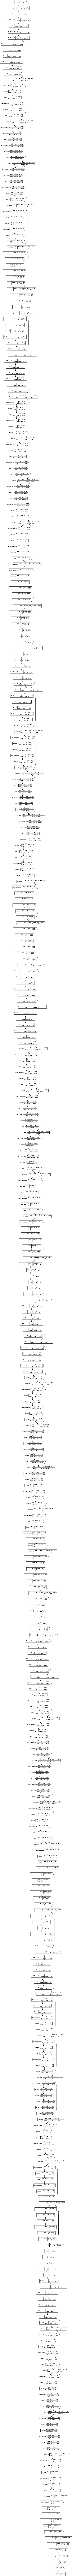

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9), 
              loss='categorical_crossentropy' ,
              metrics = ['accuracy']
              )

In [ ]:
hist=model.fit(train_generator,
          epochs=nb_epoch,
          validation_data=validation_generator
         ) 

Epoch 1/15
95/95 [==============================] - 2000s 21s/step - loss: 0.7098 - accuracy: 0.7352 - val_loss: 0.2842 - val_accuracy: 0.8974
Epoch 2/15
95/95 [==============================] - 74s 779ms/step - loss: 0.2484 - accuracy: 0.9159 - val_loss: 0.2295 - val_accuracy: 0.9228
Epoch 3/15
95/95 [==============================] - 74s 779ms/step - loss: 0.1374 - accuracy: 0.9590 - val_loss: 0.2118 - val_accuracy: 0.9267
Epoch 4/15
95/95 [==============================] - 74s 783ms/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.2065 - val_accuracy: 0.9282
Epoch 5/15
95/95 [==============================] - 74s 781ms/step - loss: 0.0719 - accuracy: 0.9808 - val_loss: 0.1944 - val_accuracy: 0.9352
Epoch 6/15
95/95 [==============================] - 74s 780ms/step - loss: 0.0437 - accuracy: 0.9894 - val_loss: 0.2056 - val_accuracy: 0.9336
Epoch 7/15
95/95 [==============================] - 74s 780ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.2062 - val_accuracy: 0.9398

In [ ]:
results = '/content/drive/MyDrive/PlantClassification/Results'
os.mkdir(results) 

In [ ]:
flowersDataSet = '/content/drive/MyDrive/PlantClassification/Results/flowersDataSet'
os.mkdir(flowersDataSet) 

In [ ]:
DenseNet121Arch = '/content/drive/MyDrive/PlantClassification/Results/DenseNet121Arch'
os.mkdir(DenseNet121Arch) 

In [ ]:
target_dir = '/content/drive/MyDrive/PlantClassification/Results/DenseNet121Arch'
architecture_name = "DenseNet121Arch"
#ct = str(datetime.datetime.now())
model.save(target_dir+'/'+architecture_name+'.h5')

In [ ]:
print(hist.history)

{'loss': [0.7097510099411011, 0.24844810366630554, 0.13736729323863983, 0.09315114468336105, 0.07194957137107849, 0.04373244568705559, 0.037272680550813675, 0.025568656623363495, 0.026090852916240692, 0.015509462915360928, 0.014389453455805779, 0.013844800181686878, 0.018825823441147804, 0.008843416348099709, 0.011037280783057213], 'accuracy': [0.7351870536804199, 0.9159218668937683, 0.9589539766311646, 0.9715325832366943, 0.9808010458946228, 0.989407479763031, 0.987752377986908, 0.9950347542762756, 0.9953657984733582, 0.9966898560523987, 0.9953657984733582, 0.9956967830657959, 0.9956967830657959, 0.9996689558029175, 0.9980139136314392], 'val_loss': [0.284227579832077, 0.22945310175418854, 0.21180009841918945, 0.20645470917224884, 0.19439977407455444, 0.20563599467277527, 0.20617449283599854, 0.20946140587329865, 0.20948445796966553, 0.2285071462392807, 0.22971108555793762, 0.22137326002120972, 0.25068575143814087, 0.22083167731761932, 0.2219497561454773], 'val_accuracy': [0.8973765373

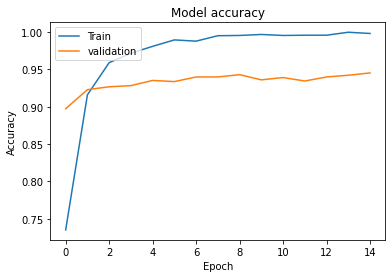

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
hist = pd.DataFrame(hist.history)

In [ ]:
hist_csv_file = '/content/drive/MyDrive/PlantClassification/Results/DenseNet121Arch/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist.to_csv(f)

In [ ]:
train_df.to_csv('/content/drive/MyDrive/PlantClassification/Results/flowersDataSet/train.csv')

In [ ]:
validation_df.to_csv('/content/drive/MyDrive/PlantClassification/Results/flowersDataSet/validation.csv')


In [ ]:
model= model_load()

In [ ]:
img_path = '/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = (img_batch)*(1./255)

result = model.predict(img_preprocessed)
print(result)

[[9.9990034e-01 2.1693142e-05 1.0893878e-05 2.1989941e-05 4.5108594e-05]]


In [ ]:
index_max=result.argmax(axis=-1)
print(index_max)

[0]


In [ ]:
print(train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
model = load_model('/content/drive/MyDrive/PlantClassification/Results/DenseNet121Arch/DenseNet121Arch.h5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________